## **Task 1**

### **1.	Import relevant libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **2.	Upload Titanic Train Data set Shared**

In [ ]:
train = pd.read_csv("/content/Titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **3.	Identify all the columns of the data set**

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### **4.	Find out total number of passengers for each class**

In [ ]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### **5.	Plot a count plot for each class of survived attribute**

<Axes: xlabel='Survived', ylabel='count'>

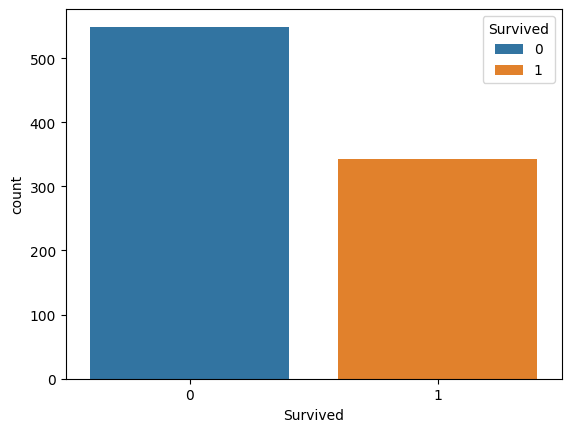

In [ ]:
sns.countplot(x ='Survived', data = train, hue='Survived')

### **6.	Plot a count plot to identify number of female and male passengers that survived or died**

<Axes: xlabel='Sex', ylabel='count'>

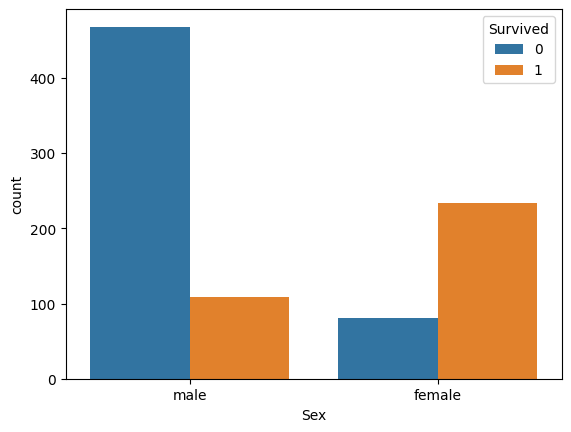

In [ ]:
sns.countplot(x ='Sex', hue = 'Survived', data = train)

### **7.	Plot a count plot to identify number of passengers survived or died that were travelling through Pclass 1, 2, and 3.**

<Axes: xlabel='Survived', ylabel='count'>

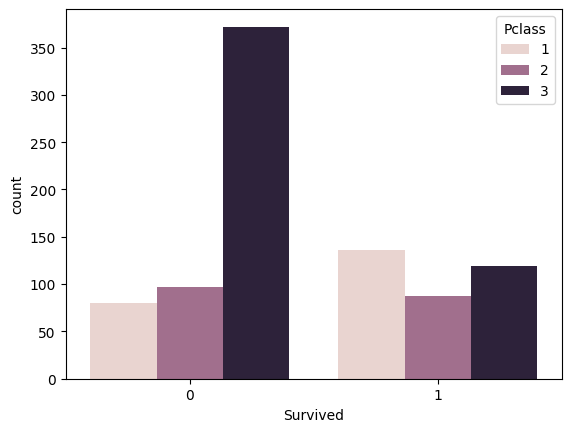

In [ ]:
sns.countplot(x ='Survived', hue = 'Pclass', data = train)

### **8.	Find out total missing values in the dataset**

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **9.	Apply missing value treatment by replacing missing values with mean, mode or dropping column depending upon type of variable**

In [ ]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
train.drop('Cabin', axis=1, inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Fare'].fillna(train['Fare'].mean(), inplace=True)

In [ ]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### **10.	Create a new feature “Family” that combiner SibSp and Parch**

In [ ]:
train['Family'] = train['SibSp'] + train['Parch']
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family'],
      dtype='object')

### **11.	Convert age to a categorical variable**

In [ ]:
train['Age'] = train['Age'].astype('category')

In [ ]:
train['Age'] = train['Age'].fillna('missing')

In [ ]:
def categorize_age(age):
  if age=='missing':
    return 'missing'
  elif age>0 and age<=5:
    return 'Infant'
  elif age>5 and age<=12:
    return 'Child'
  elif age>12 and age<=18:
    return 'Teenager'
  elif age>18 and age<=35:
    return 'Young_adult'
  elif age>35 and age<=60:
    return 'Adult'
  elif age>60:
    return 'Senior'

In [ ]:
train['Age'] = train['Age'].apply(categorize_age)

### **12.	Apply one hot encoding on categorical column like "Pclass", "Sex", "Age_Category", "Embarked"**

In [ ]:
train = pd.get_dummies(train, columns=['Pclass','Sex','Age','Embarked'], dtype=int)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Family', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_Adult', 'Age_Child', 'Age_Infant', 'Age_Senior', 'Age_Teenager',
       'Age_Young_adult', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

### **13.	Drop unnecessary columns**

In [ ]:
train.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)

In [ ]:
train.head()

,Survived,SibSp,Parch,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Adult,Age_Child,Age_Infant,Age_Senior,Age_Teenager,Age_Young_adult,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,7.2500,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1
1,1,1,0,71.2833,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1,0,0,7.9250,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,1,1,0,53.1000,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1
4,0,0,0,8.0500,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1


### **14.	Fit Logistic Regression Model**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [202]:
x = train.loc[:, train.columns != 'Survived']
x.columns

Index(['SibSp', 'Parch', 'Fare', 'Family', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'Age_Adult', 'Age_Child', 'Age_Infant',
       'Age_Senior', 'Age_Teenager', 'Age_Young_adult', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
y = train[['Survived']]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
model_train = LogisticRegression()
model_train.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **15.	Identify the accuracy and print classification report. State your inference**

In [ ]:
pred_train = model_train.predict(x)

In [ ]:
accuracy = accuracy_score(y, pred_train)
print("Accuracy:", accuracy)
print(classification_report(y, pred_train))

Accuracy: 0.8204264870931538
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       549
           1       0.79      0.72      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr, tpr, thresholds = roc_curve(y, pred_train)
auc = roc_auc_score(y, pred_train)

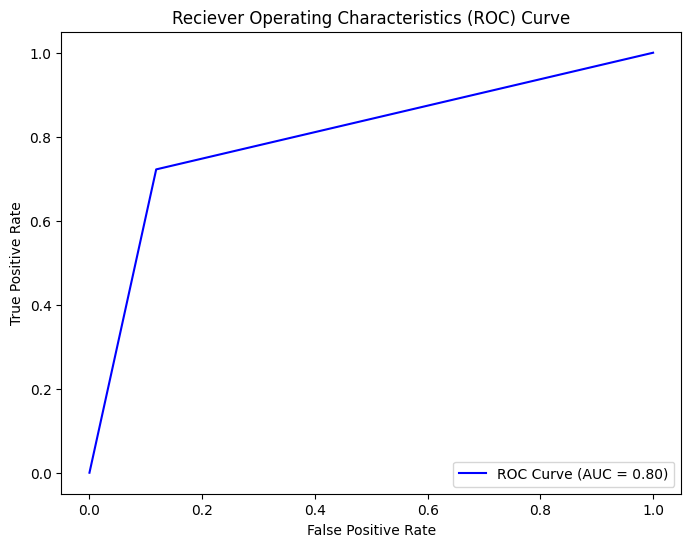

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **16.	Split dataset into train and validation. Create a new model on train data set. Predict class for validation data set. Find the accuracy and print classification report. State your inference.**

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
model_new = LogisticRegression()

model_new.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_new = model_train.predict(x_validation)

In [ ]:
accuracy = accuracy_score(y_validation, pred_new)
print("Accuracy:", accuracy)
print(classification_report(y_validation, pred_new))

Accuracy: 0.8379888268156425
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       110
           1       0.80      0.77      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179



### **17.	Plot ROC curve for the model created in task 16. State your inference.**

In [ ]:
fpr, tpr, thresholds = roc_curve(y_validation, pred_new)
auc = roc_auc_score(y_validation, pred_new)

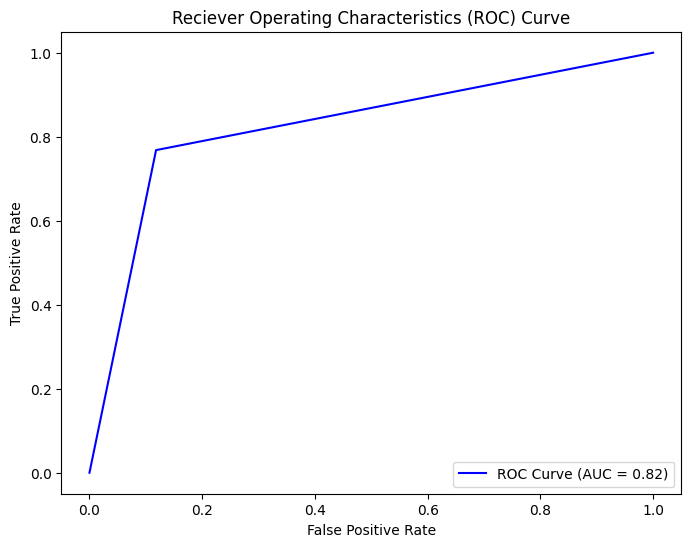

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### **18.	Apply above steps for Titanic Test data set. Compare accuracy of test and validation data set. Compare ROC curve.**

In [ ]:
test = pd.read_csv("/content/Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
test.isna().sum()

test['Age'].fillna(test['Age'].mean(), inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [ ]:
test['Family'] = test['SibSp'] + test['Parch']

test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived', 'Family'],
      dtype='object')

In [ ]:
test['Age'] = test['Age'].astype('category')
test['Age'] = test['Age'].fillna('missing')
test['Age'] = test['Age'].apply(categorize_age)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,Young_adult,0,0,330911,7.8292,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Adult,1,0,363272,7.0000,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,Senior,0,0,240276,9.6875,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,Young_adult,0,0,315154,8.6625,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Young_adult,1,1,3101298,12.2875,S,1,2


In [ ]:
test = pd.get_dummies(test, columns=['Pclass','Sex','Age','Embarked'], dtype=int)
test.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)

test.columns

Index(['SibSp', 'Parch', 'Fare', 'Survived', 'Family', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Age_Adult', 'Age_Child',
       'Age_Infant', 'Age_Senior', 'Age_Teenager', 'Age_Young_adult',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
y_test = test[['Survived']]

In [ ]:
pred_test = model_train.predict(test.drop('Survived', axis=1))

In [ ]:
accuracy = accuracy_score(y_test, pred_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, pred_test))

Accuracy: 0.7703349282296651
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       260
           1       0.71      0.66      0.69       158

    accuracy                           0.77       418
   macro avg       0.76      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418



In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
auc = roc_auc_score(y_test, pred_test)

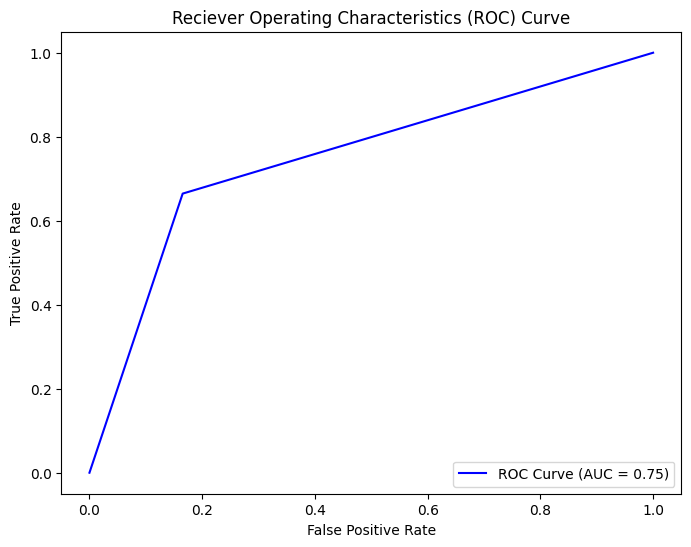

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label = f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()